# Small examples of bimodule approximation.
This notebook provide a few examples of simple bimodule with explainations. <br>
Note that "in a real usecase", simplextrees are generated by datasets and are much bigger than these ones.

## Setup

If you haven't installed the python library, you can compile it and install if via pip using the following command :


In [1]:
# !pip install --user src/

In [2]:
import matplotlib.pyplot as plt		# plots for python
import gudhi as gd					# Gudhi library
import numpy as np					# to have usable math functions in python 
import random						# generate elementary random numbeers
from mma import approx				# python bindings of module approximation c++ functions.

## Small examples

### Toy example

Generates a small simplicial complex. 
Here we have two points : 0 and 1

In [3]:
simplextree = gd.SimplexTree()
simplextree.insert([0])
simplextree.insert([1])
simplextree

We give a 2-filtration to this simplicial complex, i.e. a time of appearance of to each of these points

In [4]:
filters = np.array([
	[0,1], # the point 0 appears at time [0,1]
	[1,0], # the point 1 appears at time [1,0]
])

We compute the 0-Homology of this bi-filtration, i.e., the lifetime of these two points. Here point is "alive" at a point $x\in \mathbb R^2$ if this point appeared before $x$.
- The point $0$ lives on $\{ x \in \mathbb R^2, x\ge (0,1)\}$ : the **red** zone,
- The point $1$ lives on $\{ x \in \mathbb R^2, x\ge (1,0)\}$ : the **yellow** zone
- The points $0$ and $1$ both live at the same time if the two rectangles overlap : the **red + yellow** zone

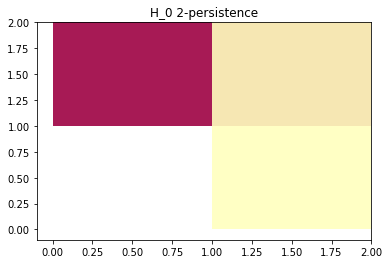

In [5]:
mod = approx(simplextree, filters, box=[[-0.1,-0.1],[2,2]])      # computes the 0-Homology of this 2-filration
mod.plot(alpha=0.9) 										     # Plots the result. alpha is a transparancy parameter

**What happens now** if we try to connect the two points with the segment $[0,1]$ ?

In [6]:
simplextree.insert([0,1])

True

This segment can only appear if the two points already exists in the filtration. 

If we don't specify its birthtime, it will appear once the two points appeared, that is on the cone $\{ x : x \ge (1,1)\}$

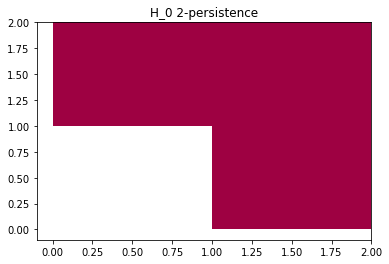

In [7]:
approx(simplextree, filters, box=[[-0.1,-0.1],[2,2]]).plot()

The colors have merged. Why ? That's because at time $(1,1)$ the segment $[0,1]$ connects the points $0$ and $1$; thus they are "the same in homology".

Now, what happens if we connect these 2 points *later* ?? Let's push the birth time of the segment $[0,1]$ to $(1.5,1.5)$ for example, and see.

In [8]:
filters = np.array([
	[0,1],       # the point    0    appears at time [0,1]
	[1,0],       # the point    1    appears at time [1,0]
	[1.5, 1.5]   # the segment [0,1] appears at time [1.5,1.5]
])

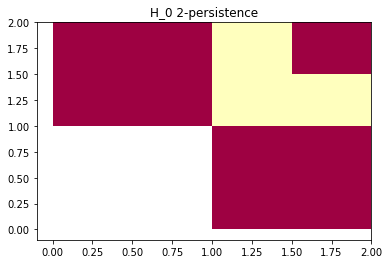

In [9]:
approx(simplextree, filters, box=[[-0.1,-0.1],[2,2]]).plot()

How to interpret this image :
- the points $0$ and $1$ are still connected (thus of the same color) as the segment $[0,1]$ still appears at $(1.5,1.5)$
- between time $(1,1)$ and time $(1.5,1.5)$ the points $0$ and the point $1$ are different, thus, we have an excess of one dimension, symbolized by the color yellow (above the red shape).

**Remark :** Although this is still the lifetime of a unique connected component (i.e. the module is indecomposable), this object can be of dimension 2 ! In that case we say that this is **not** an interval module.

## A non-(interval-decomposable) module.
Even if the module is **not** interval-decomposable, the algorithm will still return a persistence module, but we don't have a theorical result on its closeness (for instance wrt the interleaving distance) to the real module. <br>
We consider the follwing chain complex.

In [10]:
#         1
#       / * \
#      / *** \
#     / ***** \
#   0 -------- 2
#     \       /
#      \     /
#       \   /
#         3   

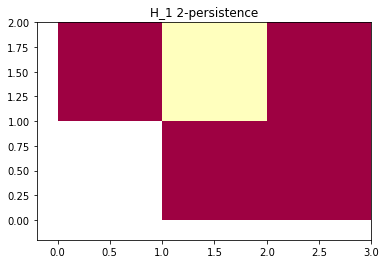

In [11]:
# Generates a complex chain whose 2-persistence is an indecomposable module which is not an indicator module.
simplextree = gd.SimplexTree()
simplextree.insert([0,1,2])
simplextree.insert([0,3])
simplextree.insert([2,3])

#  filtration is ordered by lexicographic order
filtration = np.array([
    #filtration # simplex
    [0, 0],     #0
    [0, 1],     #1
    [0, 0],     #2
    [0, 0],     #3
    [0, 1],     #0 1
    [1, 0],     #0 2
    [0, 0],     #0 3
    [0, 1],     #1 2
    [0, 0],     #2 3
    [2, 1]      #0 1 2
])

# An interval decomposable approximation of an indecomposable module.
# Note that it will be the same approximation for any precision < 1.
box = [[-0.2,-0.2],[3,2]]
approx(simplextree, filtration, precision=0.5, box=box).plot(dimension=1)



## Module approximation versus precision

### Band example

As above, we generate a 2-persistence module, and compute an approximation.

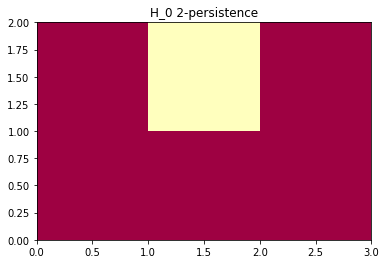

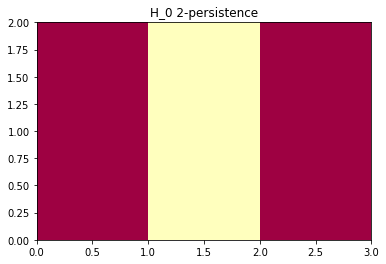

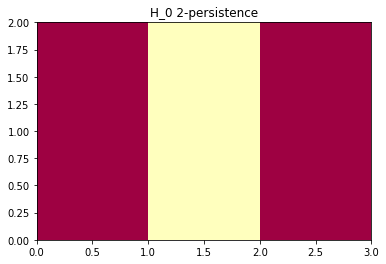

In [12]:
# Generates a 2-persistence module
simplextree = gd.SimplexTree()
simplextree.insert([0,1])
simplextree.insert([1,2])
F1 = np.array([0,2,1])
F2 = np.array([0,0,0])
F  = [F1,F2]
box = [[0,0],[3,2]]
# Computes an approximation for precision = 2 and precision = 1. The approximation is exact here if precision < 1 
# The plot_vine_2d plots matched barcodes along slope 1 lines.

approx(simplextree, F, precision=2,     box=box).plot()
approx(simplextree, F, precision=1,     box=box).plot()
approx(simplextree, F, precision=0.001, box=box).plot()

### Two examples having the same pointwise dimension.

In [13]:
s = gd.SimplexTree()
s.insert([0,1,4])
s.insert([0,3,4])
s.insert([1,3,4])
s.insert([0,2,5])
s.insert([0,3,5])
s.insert([1,2,5])
s.insert([1,3,5])
s.insert([6,7,9])
s.insert([6,8,9])
s.insert([7,8,9])
s.insert([6,7,10])
s.insert([6,8,10])
s.insert([7,8,10])
F1 = np.array([1,1,1,4,5,4,4,4,4,4,5])
F2 = np.array([1,1,4,1,5,4,4,4,4,5,4])
filters = np.hstack([F1[:,np.newaxis], F2[:,np.newaxis]])
box = [[0,0], [8,8]]

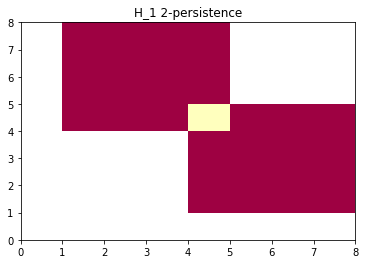

In [14]:
# This simplicial complex s, with filtration filters induce the following 2-persistence module
approx(s, filters, precision=0.1, box=box).plot(dimension=1)

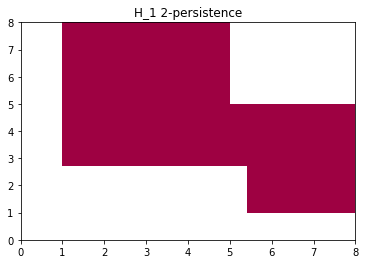

In [15]:
# But if we decrease the precision, the approximation is no longer exact, 
# but still controlled in interleaving distance by the precision
approx(s, filters, precision=3.1, box=box).plot(dimension=1)

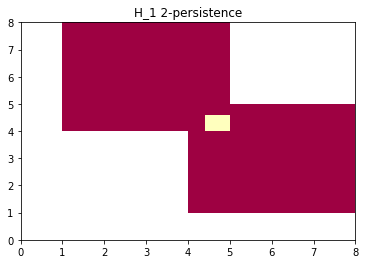

In [16]:
# Another example of precision
approx(s, filters, precision=2.1, box=box).plot(dimension=1)

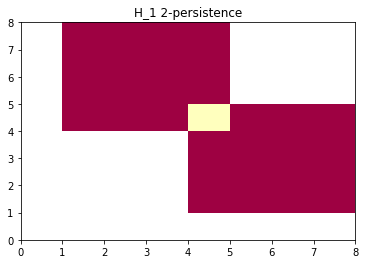

In [17]:
# In that case the module is completely recovered if the precision is smaller than 1
approx(s, filters, precision=0.9, box=box).plot(dimension=1)

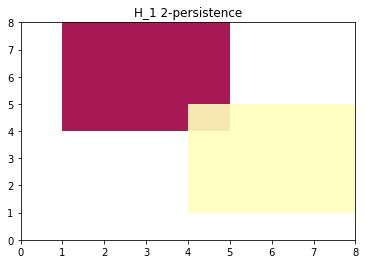

In [18]:
# Another bimodule having the same pointwise betti number
s = gd.SimplexTree()
#cycle 1
s.insert([0,1,3])
s.insert([0,2,3])
s.insert([1,2,3])
#cycle 2
s.insert([4,5,7])
s.insert([5,6,7])
s.insert([4,6,7])
filters = [[1,1,1,5,4,4,4,4], [4,4,4,4,1,1,1,5]]
box = [[0,0],[8,8]]

approx(s, filters, precision=1, box=box).plot(dimension=1, alpha=0.9)